<a href="https://colab.research.google.com/github/vdelgadobenito/psycovid/blob/master/Covidistress1_ipywidgets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# url = "https://files.de-1.osf.io/v1/resources/z39us/providers/osfstorage/5ed51efbc7568603fa2d3472?action=download&direct&version=1"

In [5]:
import pandas as pd

data = pd.read_csv("covfinal.csv", error_bad_lines=False, encoding='latin-1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (54,55,56,57,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Duration..in.seconds.,RecordedDate,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_state,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_islolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,AD_check,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,...,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_coping_txt,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,Final_open,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
0,1,180,2020-05-30 23:47:17,SAR,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Tucumán,Single,0.0,Yes,Isolated,4.0,0.0,NaN,NaN,NaN,5.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,3.0,5.0,2.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.900000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3100,2020-05-29 23:30:15,UR,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,<U+0622><U+0632><U+0627><U+062F> <U+06A9><U+06...,Single,0.0,Yes,Life carries on with minor changes,NaN,NaN,Program A,NaN,No,3.0,3.0,1.0,5.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,1.0,3.0,3.0,10.0,5.0,4.0,4.0,2.0,...,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,NaN,1.0,2.0,3.0,4.0,2.0,3.0,NaN,2.200000,2.333333,2.000000,5.000000,5.333333,5.0,5.000000,5.0,NaN
2,3,127,2020-05-30 22:40:15,SAR,47,Female,"Some College, short continuing education or eq...",Some College or equivalent,Self-employed,Argentina,no,Córdoba,Single,0.0,No,Isolated,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1710,2020-05-29 22:47:17,BG,79,Male,"College degree, bachelor, master",College degree,Not employed,Bulgaria,no,Lovech,Divorced/widowed,0.0,Yes,Life carries on with minor changes,1.0,0.0,NaN,Program D,No,3.0,5.0,3.0,3.0,3.0,5.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,8.0,0.0,5.0,2.0,4.0,...,3.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,NaN,2.0,5.0,5.0,2.0,5.0,4.0,NaN,3.600000,4.000000,4.000000,4.666667,4.000000,5.0,5.000000,3.9,NaN
4,5,2239,2020-05-29 22:42:30,SAR,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,no,Mendoza,Married/cohabiting,0.0,Yes,Isolated,1.0,0.0,Program A,NaN,No,3.0,3.0,2.0,NaN,3.0,NaN,5.0,2.0,NaN,3.0,1.0,1.0,NaN,8.0,8.0,9.0,8.0,5.0,9.0,...,6.0,5.0,5.0,5.0,6.0,4.0,5.0,6.0,NaN,6.0,2.0,6.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,3.0,Tejer. Leer,5.0,5.0,6.0,2.0,2.0,6.0,Informaciones no confiables,2.714286,1.000000,3.666667,4.666667,5.333333,5.0,4.666667,5.0,NaN


In [6]:
import pandas as pd

data = pd.read_csv("covfinal2.csv")

# data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()

data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (53,54,55,56,57,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Duration..in.seconds.,RecordedDate,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_islolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,AD_check,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,...,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_coping_txt,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,Final_open,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
0,1,180,2020-05-30 23:47:17,SAR,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Single,0.0,Yes,Isolated,4.0,0.0,NaN,NaN,NaN,5.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,3.0,5.0,2.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.900000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3100,2020-05-29 23:30:15,UR,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,Single,0.0,Yes,Life carries on with minor changes,NaN,NaN,Program A,NaN,No,3.0,3.0,1.0,5.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,1.0,3.0,3.0,10.0,5.0,4.0,4.0,2.0,4.0,...,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,NaN,1.0,2.0,3.0,4.0,2.0,3.0,NaN,2.200000,2.333333,2.000000,5.000000,5.333333,5.0,5.000000,5.0,NaN
2,3,127,2020-05-30 22:40:15,SAR,47,Female,"Some College, short continuing education or eq...",Some College or equivalent,Self-employed,Argentina,no,Single,0.0,No,Isolated,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1710,2020-05-29 22:47:17,BG,79,Male,"College degree, bachelor, master",College degree,Not employed,Bulgaria,no,Divorced/widowed,0.0,Yes,Life carries on with minor changes,1.0,0.0,NaN,Program D,No,3.0,5.0,3.0,3.0,3.0,5.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,8.0,0.0,5.0,2.0,4.0,NaN,...,3.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,NaN,2.0,5.0,5.0,2.0,5.0,4.0,NaN,3.600000,4.000000,4.000000,4.666667,4.000000,5.0,5.000000,3.9,NaN
4,5,2239,2020-05-29 22:42:30,SAR,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,no,Married/cohabiting,0.0,Yes,Isolated,1.0,0.0,Program A,NaN,No,3.0,3.0,2.0,NaN,3.0,NaN,5.0,2.0,NaN,3.0,1.0,1.0,NaN,8.0,8.0,9.0,8.0,5.0,9.0,6.0,...,6.0,5.0,5.0,5.0,6.0,4.0,5.0,6.0,NaN,6.0,2.0,6.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,3.0,Tejer. Leer,5.0,5.0,6.0,2.0,2.0,6.0,Informaciones no confiables,2.714286,1.000000,3.666667,4.666667,5.333333,5.0,4.666667,5.0,NaN


In [7]:
%%time
def datacountry(country='Poland'):
    return data.loc[data['Country']==country]

datacountry('Poland').head()


CPU times: user 17.7 ms, sys: 0 ns, total: 17.7 ms
Wall time: 21.1 ms


In [8]:

def datalanguage(UserLanguage='PL'):
    return data.loc[data['UserLanguage']==UserLanguage]

datalanguage('PL')[['neu','ext',	'ope',	'agr','con']]

,neu,ext,ope,agr,con
1515,4.000000,4.333333,4.333333,3.333333,4.666667
1662,2.666667,6.000000,6.000000,5.333333,3.000000
3089,NaN,NaN,NaN,NaN,NaN
3468,4.333333,2.333333,3.000000,2.333333,4.666667
3587,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
118662,2.000000,2.000000,5.333333,3.666667,4.333333
118701,5.666667,5.333333,6.000000,3.666667,5.333333
118702,4.000000,6.000000,6.000000,3.666667,3.333333
118760,1.666667,2.666667,4.333333,4.333333,3.666667


In [9]:
list(datalanguage('PL')[['neu','ext',	'ope',	'agr','con']].mean())

[3.494432207537937,
 3.90776104786388,
 4.429061084588063,
 4.296915167095109,
 4.230199534826779]

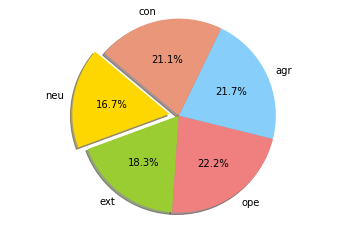

In [13]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'neu','ext',	'ope',	'agr','con'
sizes = list(datalanguage('EN')[['neu','ext',	'ope',	'agr','con']].mean())
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'darksalmon']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [16]:
print( list(datalanguage('PL')[['neu','ext',	'ope',	'agr','con']].mean()))

[3.494432207537937, 3.90776104786388, 4.429061084588063, 4.296915167095109, 4.230199534826779]


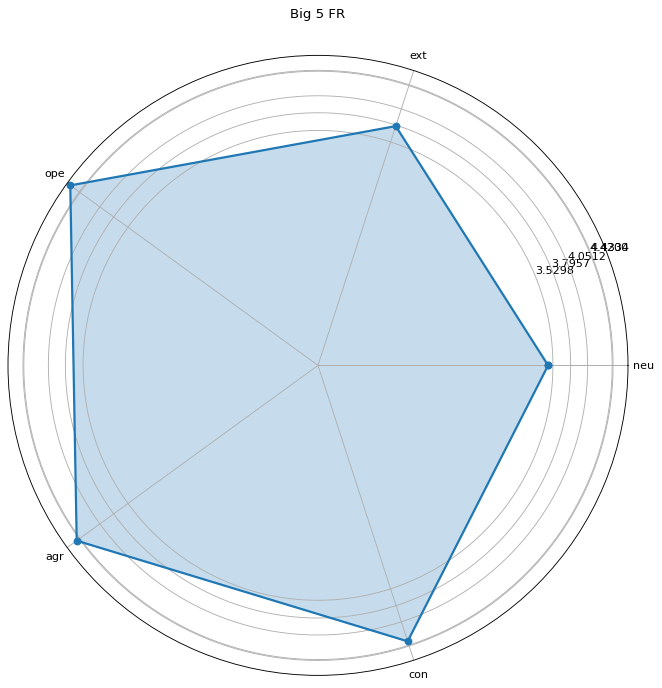

In [46]:
import matplotlib.pyplot as plt
import numpy as np

labels=['neu','ext',	'ope',	'agr','con']
markers = list(datalanguage('EN')[['neu','ext',	'ope',	'agr','con']].mean())


def make_radar_chart(name="Big 5", stats = markers, attribute_labels = labels, plot_markers = markers, language="FR"):
    markers = list(datalanguage(language)[['neu','ext',	'ope',	'agr','con']].mean())
    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig= plt.figure(figsize=(10, 15), dpi=80, facecolor='w', edgecolor='red')
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name+' '+language)
    ax.grid(True)


    return plt.show()

make_radar_chart() # example


In [47]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def f(x):
    return x

interact(make_radar_chart, name="Big 5", stats=fixed(markers), attribute_labels = fixed(labels), plot_markers = fixed(markers));



interactive(children=(Text(value='Big 5', description='name'), Text(value='FR', description='language'), Outpu…

In [68]:
def datagender(gender='Female'):
    return data.loc[data['Dem_gender']==gender]

def datacountry(country='Poland'):
    return data.loc[data['Country']==country]

datacountry('Poland').head()

def make_radar_chart(name="Big 5", stats = markers, attribute_labels = labels, plot_markers = markers, gender="Female"):
    markers = list(datagender(gender)[['neu','ext',	'ope',	'agr','con']].mean())
    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig= plt.figure(figsize=(10, 15), dpi=80, facecolor='w', edgecolor='red')
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name+' '+gender)
    ax.grid(True)


    return plt.show()

interact(make_radar_chart, stats=fixed(markers), attribute_labels = fixed(labels), plot_markers = fixed(markers), gender=[('Female', 'Female'), ('Male', 'Male')]);



interactive(children=(Text(value='Big 5', description='name'), Dropdown(description='gender', options=(('Femal…

In [87]:
def datamix(gender= ["Female"], country="Germany", age=44):
    return data.loc[data['Dem_gender'].isin(gender)].loc[data['Country']==country].loc[data['Dem_age']==age]



datamix(["Male","Female"]).head()

,Unnamed: 0,Duration..in.seconds.,RecordedDate,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_islolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,AD_check,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,...,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_coping_txt,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,Final_open,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
12322,12323,714,2020-04-20 12:38:56,DE,44,Male,"College degree, bachelor, master",Some College or equivalent,Full time employed,Germany,no,Married/cohabiting,3.0,No,Life carries on with minor changes,1.0,2.0,NaN,Program C,Yes,1.0,2.0,2.0,5.0,4.0,1.0,5.0,4.0,3.0,1.0,3.0,1.0,3.0,6.0,9.0,3.0,7.0,7.0,4.0,2.0,...,6.0,6.0,6.0,6.0,6.0,5.0,6.0,1.0,5.0,NaN,5.0,3.0,4.0,4.0,1.0,5.0,4.0,2.0,1.0,3.0,5.0,4.0,3.0,NaN,2.0,6.0,4.0,4.0,4.0,3.0,NaN,1.6,2.333333,1.666667,4.666667,5.333333,5.333333,3.666667,5.9,NaN
28833,28834,1103,2020-04-10 04:10:25,DE,44,Female,"College degree, bachelor, master",Up to 9 years of school,Full time employed,Germany,no,Married/cohabiting,1.0,Yes,Life carries on with minor changes,1.0,0.0,NaN,Program C,No,3.0,4.0,4.0,5.0,4.0,2.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,0.0,4.0,4.0,9.0,1.0,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,4.0,5.0,1.0,1.0,2.0,3.0,1.0,5.0,5.0,1.0,5.0,6.0,6.0,1.0,6.0,NaN,6.0,5.0,5.0,3.0,2.0,2.0,Beruflich als Systemrelevant zu gelten und von...,2.7,3.666667,2.666667,4.000000,6.000000,1.666667,4.333333,5.6,NaN
28925,28926,969,2020-04-10 03:35:35,DE,44,Male,"College degree, bachelor, master",Some College or equivalent,Not employed,Germany,no,Single,0.0,Yes,Life carries on with minor changes,2.0,0.0,NaN,Program D,No,2.0,4.0,2.0,4.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,5.0,8.0,6.0,8.0,6.0,6.0,5.0,...,3.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,3.0,5.0,1.0,5.0,NaN,2.0,4.0,3.0,2.0,5.0,4.0,Informationen aus wissenschaftlichen Nachricht...,2.7,3.666667,2.000000,3.666667,5.333333,3.666667,4.333333,4.2,NaN
29026,29027,1148,2020-04-10 03:00:02,DE,44,Male,"College degree, bachelor, master",College degree,Self-employed,Germany,no,Married/cohabiting,0.0,Yes,Life carries on with minor changes,NaN,NaN,Program A,NaN,No,3.0,5.0,2.0,5.0,5.0,2.0,5.0,5.0,2.0,2.0,2.0,1.0,1.0,8.0,10.0,8.0,9.0,8.0,10.0,10.0,...,5.0,6.0,5.0,6.0,6.0,5.0,6.0,5.0,4.0,3.0,1.0,3.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,1.0,5.0,NaN,5.0,5.0,4.0,3.0,4.0,3.0,NaN,2.0,1.333333,1.666667,2.666667,4.666667,4.666667,2.000000,5.7,NaN
32730,32731,961,2020-04-08 14:40:55,SK,44,Female,"College degree, bachelor, master",Up to 12 years of school,Full time employed,Germany,yes,Single,1.0,No,Life carries on with minor changes,NaN,NaN,Program A,NaN,No,2.0,2.0,2.0,4.0,2.0,2.0,5.0,4.0,2.0,2.0,1.0,1.0,1.0,7.0,8.0,2.0,6.0,3.0,8.0,NaN,...,1.0,3.0,5.0,4.0,6.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,5.0,5.0,1.0,1.0,NaN,4.0,1.0,4.0,1.0,1.0,NaN,Clovek si uvedomi kolko nebezpwcnych debilov j...,2.1,1.000000,3.666667,4.666667,4.666667,3.333333,3.333333,3.2,NaN


In [92]:
def datamix(gender= "Female", country="Germany", age=44):
    return data.loc[data['Dem_gender']==(gender)].loc[data['Country']==country].loc[data['Dem_age']==age]


def make_radar_chart(name="Big 5", stats = markers, attribute_labels = labels, plot_markers = markers, gender="Female", country="Germany", age=44):
    markers = list(datamix(gender, country, age)[['neu','ext',	'ope',	'agr','con']].mean())
    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig= plt.figure(figsize=(10, 15), dpi=80, facecolor='w', edgecolor='red')
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name+': '+gender+' in '+country+', aged '+str(age))
    ax.grid(True)


    return plt.show()

interact(make_radar_chart, stats=fixed(markers), attribute_labels = fixed(labels), plot_markers = fixed(markers), gender=[('Female', 'Female'), ('Male', 'Male')], age=(20,65));



interactive(children=(Text(value='Big 5', description='name'), Dropdown(description='gender', options=(('Femal…